# CHECK ATTACK (PERTURBED) FILES

In [1]:
import IPython.display as ipd
import logging
import numpy as np
import librosa
from src.audio_utils import read_audio
from src.utils import *
# from sp_utils import spectrogram_inversion, get_spectrogram_from_audio
# from attacks_utils import retrieve_single_cached_spec, load_spec_model, evaluate_spec, get_pred_class
from check_attacks_utils import check_attack

logging.getLogger('numba').setLevel(logging.WARNING)
logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.colorbar').disabled = True
logging.getLogger('matplotlib.pyplot').disabled = True


In [2]:
seed_everything(1234)
set_gpu(-1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
plt.style.use('dark_background')
rate = 16000

GPU selected: 1 - Quadro P6000


In [19]:
###############################################################
#######     insert here data     ##############################
###############################################################

eval_model = 'SENet'
attack_model = 'SENet'
attack = 'FGSM'
file_number = 1000147
epsilon = 2.0

In [20]:
perturbed_audio, original_audio, perturbed_spec, original_spec = check_attack(eval_model=eval_model, 
                                                                 attack_model=attack_model, 
                                                                 attack=attack, 
                                                                 file_number=file_number, 
                                                                 epsilon=epsilon, 
                                                                 device=device)

--> File name: FGSM_SENet_LA_E_1000147_2dot0.flac
--> Model evaluated: SENet
--> Attack: FGSM on SENet
--> Epsilon: 2.0
--> GT label: 1
 --> Predicted label: 0, 

tensor([[-9.9062e-04, -6.9177e+00]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)


In [21]:
ipd.Audio(perturbed_audio, rate=rate)

In [22]:
ipd.Audio(original_audio, rate=rate)

In [23]:
def plot_spec(spec):
    plt.figure(figsize=(12,8))
    sr=16000
    librosa.display.specshow(spec, x_axis='time', sr=sr, y_axis='linear')
    plt.colorbar()
    plt.show()

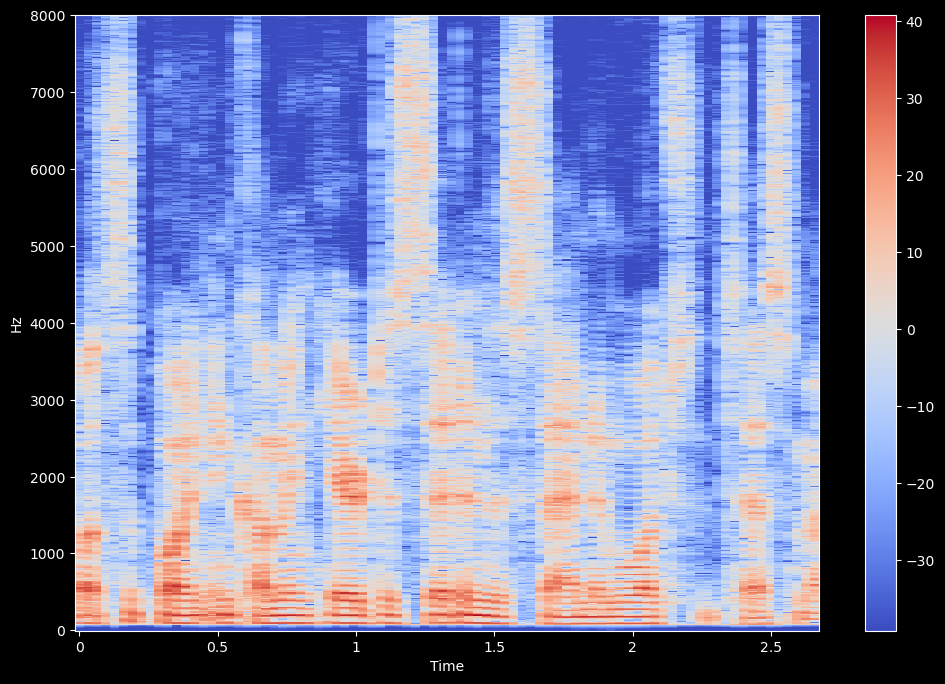

In [24]:
plot_spec(original_spec)

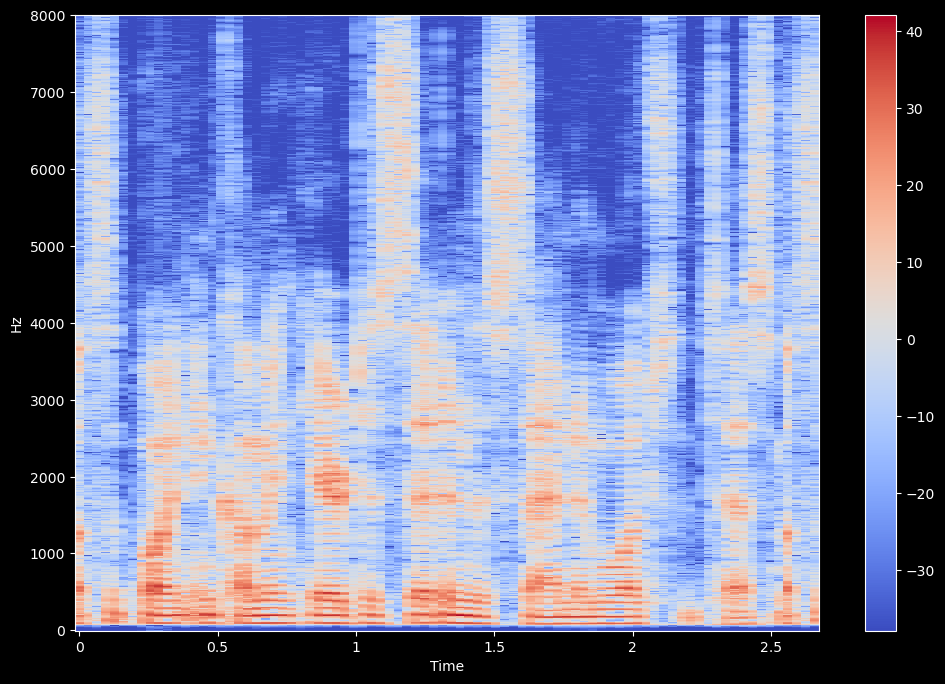

In [25]:
plot_spec(perturbed_spec)